In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_column', 30)
sns.set_style('whitegrid')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [121]:
df = pd.read_csv('fcai_db_cs251_midterm.csv')
df.head()

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade (7+1)
0,20150383,D,B,C,D,D,A,C,A,D,B,A,B,B,B,D,E,7,4.5
1,20170252,A,E,C,E,E,A,D,E,C,B,A,B,E,C,E,E,7,4.5
2,20170456,A,B,C,D,E,E,E,E,C,D,A,B,D,C,A,B,9,5.0
3,20180129,D,E,E,E,D,D,A,E,C,D,A,B,D,C,C,E,9,5.0
4,20180467,D,E,D,E,D,A,C,A,A,C,A,B,E,D,C,E,7,3.5


In [122]:
df = df.rename(columns={'finalGrade (7+1)': 'finalGrade7_1'})

### Quick look at the dataset

In [123]:
df[['score', 'finalGrade7_1']].describe().round()

,score,finalGrade7_1
count,609.0,609.0
mean,9.0,5.0
std,2.0,1.0
min,3.0,2.0
25%,7.0,4.0
50%,9.0,5.0
75%,10.0,6.0
max,15.0,8.0


There are small number of null values in some columns 

In [124]:
df.isnull().sum()

Stud_ID          0
MCQ1             1
MCQ2             0
MCQ3             0
MCQ4             1
MCQ5             0
MCQ6             1
MCQ7             1
MCQ8             1
MCQ9             0
MCQ10            1
MCQ11            1
MCQ12            0
MCQ13            0
MCQ14            0
MCQ15            0
MCQ16            1
score            0
finalGrade7_1    0
dtype: int64

There is no duplicates in the dataset

In [125]:
df[df.duplicated(keep=False)]

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1


Interesting, There's one outlier :)

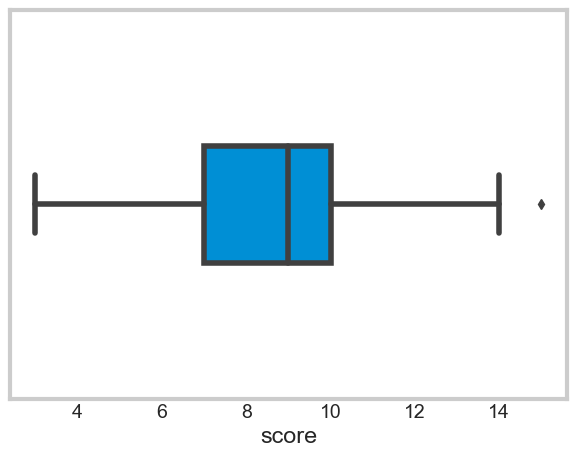

In [162]:
sns.boxplot(x=df['score'], width=0.3, saturation=1)
plt.grid(False)
plt.show()

In [127]:
correct_ans = df[df['score'] > 14]
correct_ans

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1
86,20210127,D,B,C,B,D,A,E,E,C,A,A,B,D,C,A,E,15,8.0


### Let's Visualize!

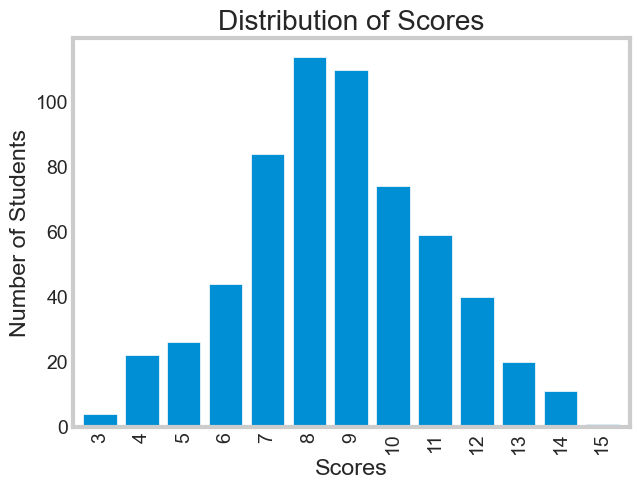

In [128]:
df['score'].value_counts() \
    .sort_index() \
    .plot(kind='bar',
          width=0.8)
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Scores')
plt.grid(False)
plt.show()

In [129]:
def pass_or_fail(finalGrade):
    if finalGrade > 4:
        return 'Pass'
    else:
        return 'Fail'

df['pass_or_fail'] = df['finalGrade7_1'].apply(pass_or_fail)

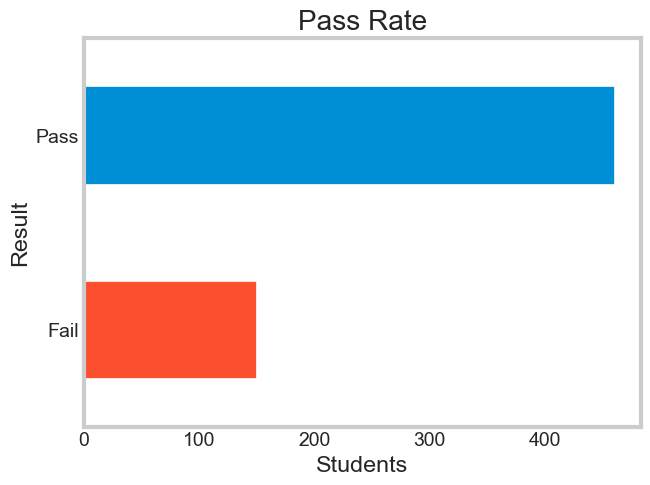

In [145]:
df['pass_or_fail'].value_counts().sort_values() \
    .plot(kind='barh',
          color=[color_pal[1], color_pal[0]],
          width=0.5)
plt.ylabel('Result')
plt.xlabel('Students')
plt.title('Pass Rate')
plt.grid(False)
plt.show()

In [131]:
questions = ['MCQ1', 'MCQ2', 'MCQ3', 'MCQ4', 'MCQ5', 'MCQ6', 'MCQ7','MCQ8', 'MCQ9', 'MCQ10', 'MCQ11', 'MCQ12', 'MCQ13', 'MCQ14', 'MCQ15','MCQ16']
# This function takes DataFrame as parameter and return a new one as answers count for each quesiton
def count_answers(df):
    my_list = []
    for q in questions:
        temp = df.groupby(q)['Stud_ID'] \
            .count() \
            .to_frame(name=q)
        my_list.append(temp)
    result = pd.concat(my_list, axis=1)
    return (result.fillna(0))

#### Here, we will group students into two groups (each one of 120 student):
 - Top, who get highest score
 - Bottom, who get lowest score

In [132]:
# Create the two DataFrames
top_df = df.sort_values('score', ascending=False).head(120)
bottom_df = df.sort_values('score', ascending=True).head(120)
top_df = count_answers(top_df)
bottom_df = count_answers(bottom_df)

In [133]:
# then, prepare them for ploting
top_df['Class'] = top_df['Class'] = 'Top'
bottom_df['Class'] = bottom_df['Class'] = 'Bottom'
dss = pd.concat([top_df, bottom_df])

- questions 2,4,5,6,8 have some level of difficulty
- questions 13, 14 are kind of tricky

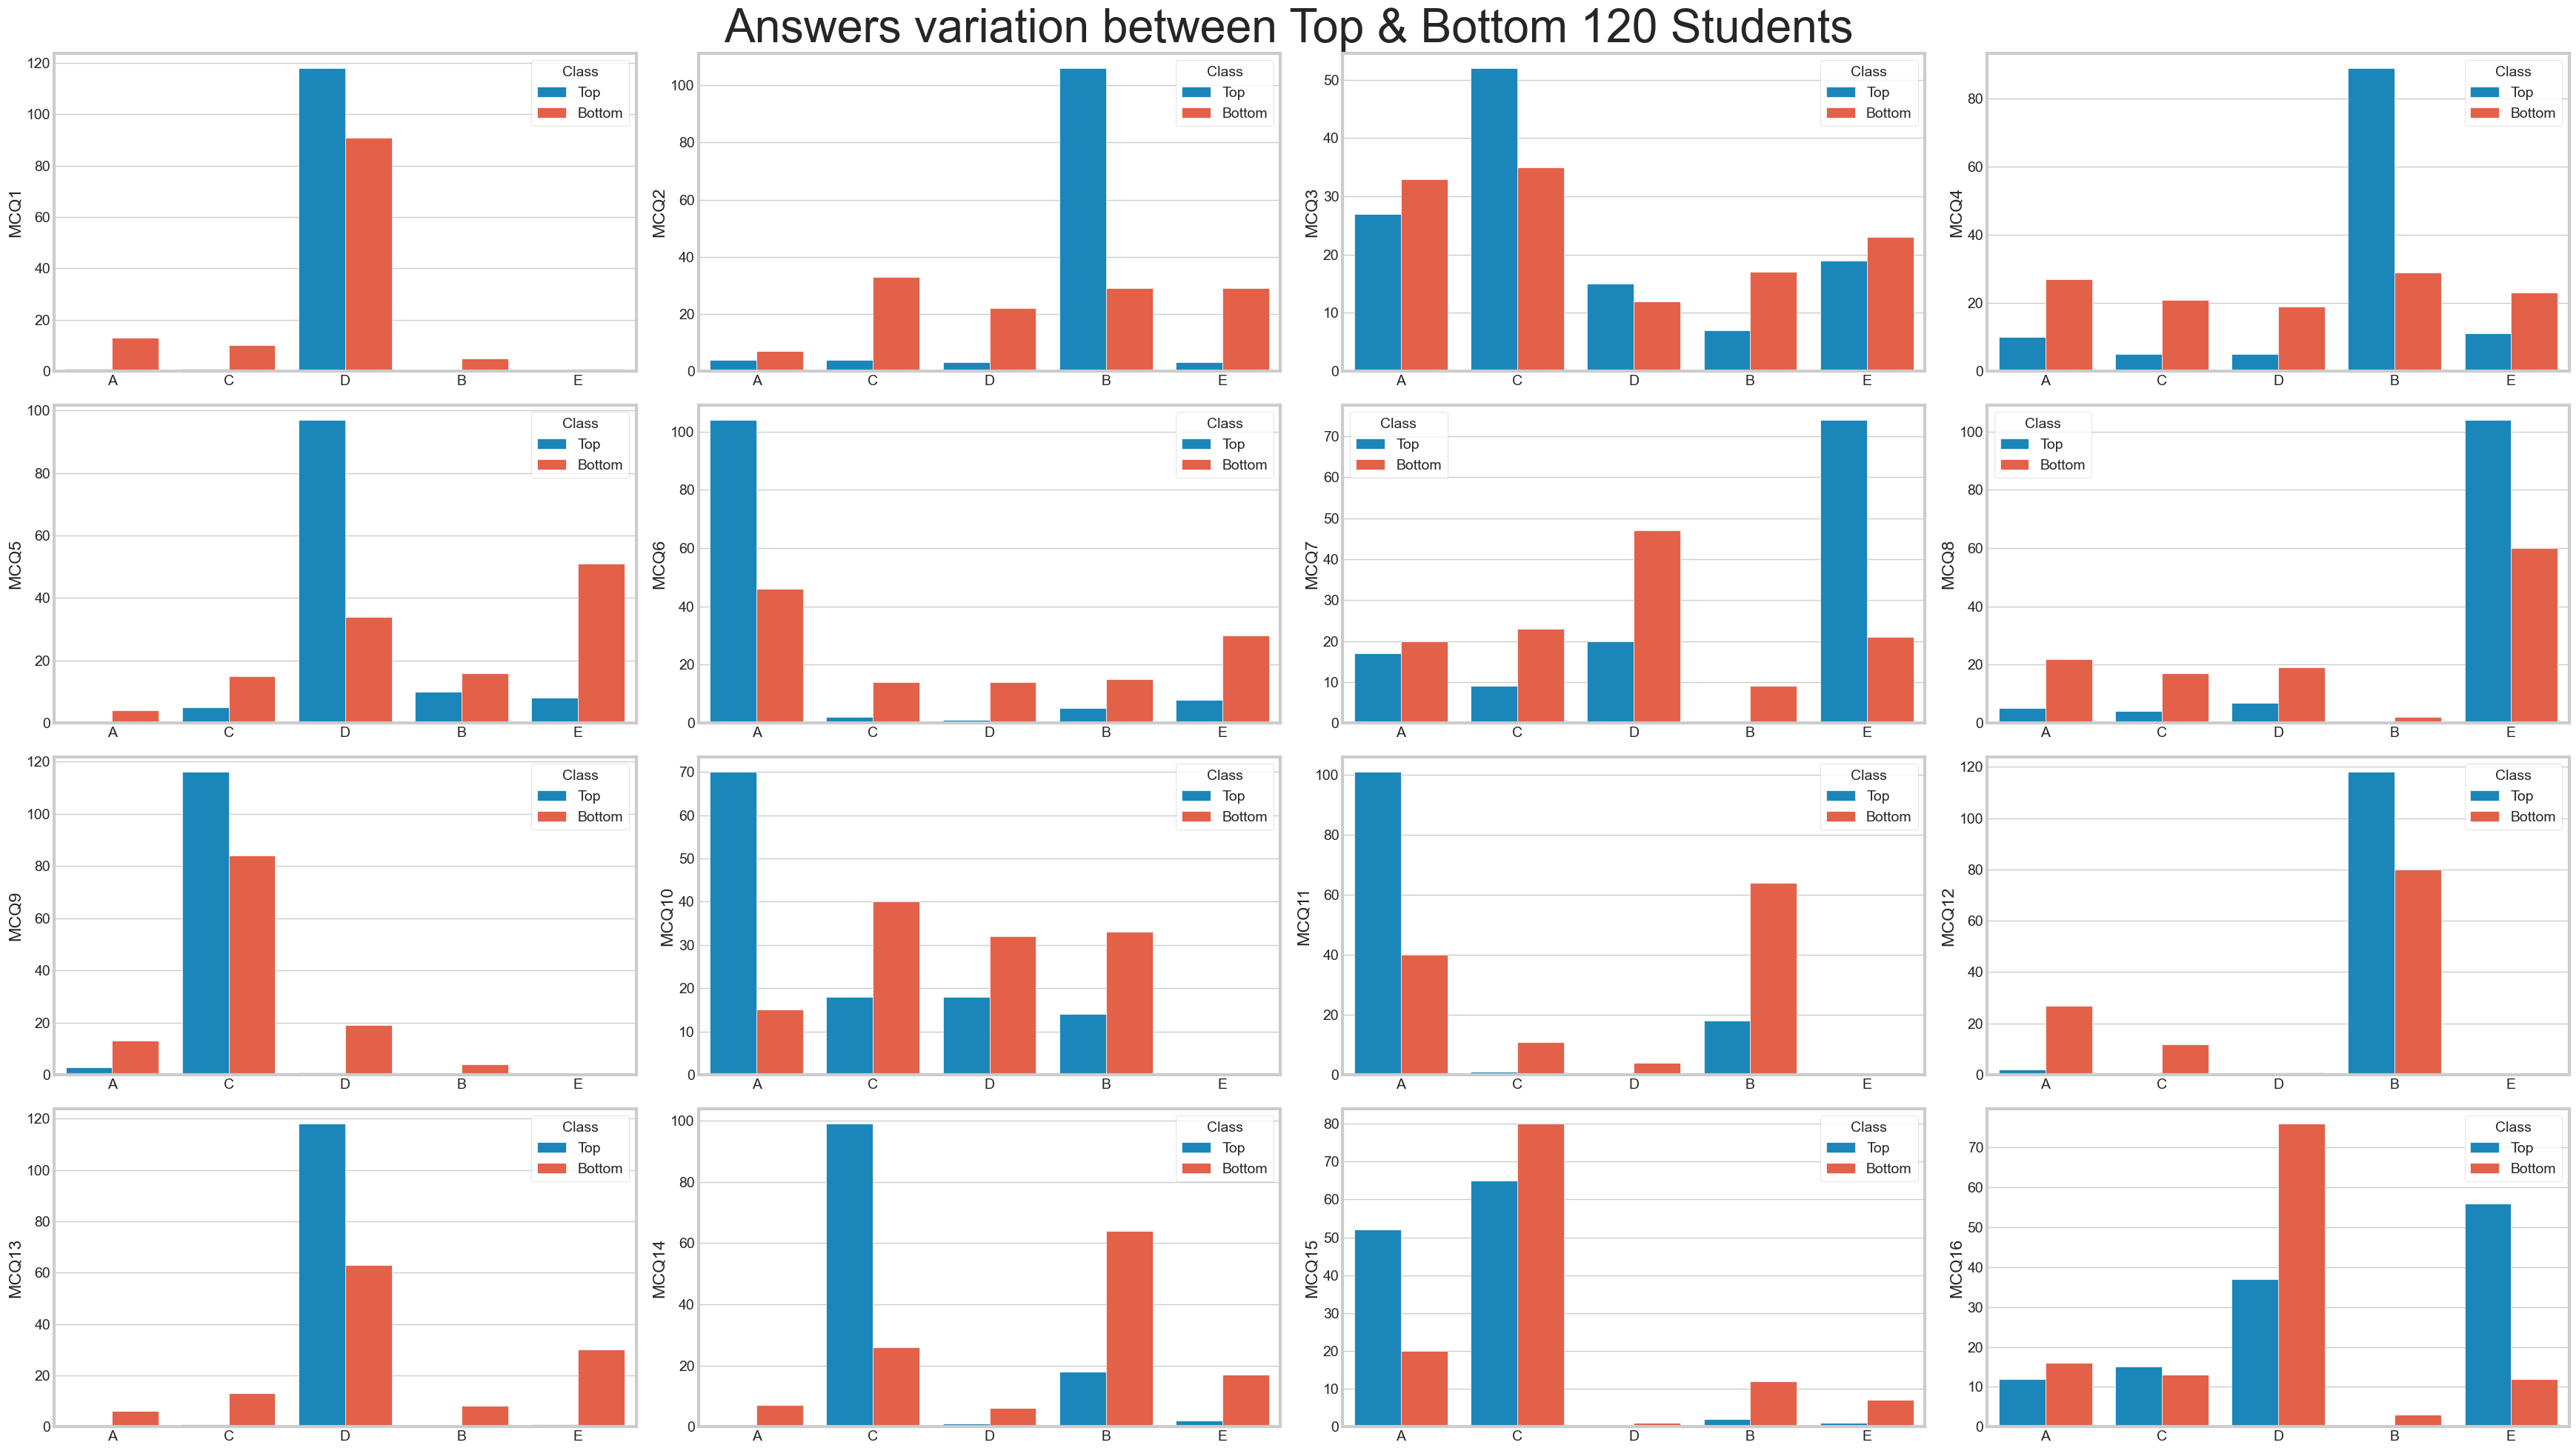

In [134]:
fig, axes = plt.subplots(4, 4, figsize=(35, 20))
axs = axes.flatten()
i = 0
j = 0
q = 0
for i in range(0,4):
    for j in range(0,4):
        sns.barplot(data=dss,
                    x=dss.index,
                    y=questions[q],
                    hue='Class',
                    ax=axes[i,j])
        q += 1
fig.suptitle('Answers variation between Top & Bottom 120 Students', fontsize=45)
plt.tight_layout()
plt.show()

## Univariate Analysis
- Analyzing each question indevisualy
- averages of right answer for each question

In [135]:
answers = correct_ans.loc[86][questions].to_list()

for i,q in enumerate(questions):
    print(q, answers[i])

MCQ1 D
MCQ2 B
MCQ3 C
MCQ4 B
MCQ5 D
MCQ6 A
MCQ7 E
MCQ8 E
MCQ9 C
MCQ10 A
MCQ11 A
MCQ12 B
MCQ13 D
MCQ14 C
MCQ15 A
MCQ16 E
